In [5]:
#importing necessary libraries
import pandas as pd
import os as os
import numpy as np
import matplotlib.pyplot as plt
import random
import math
#Dataset reading

ucb = pd.read_csv('ucb_data.csv')
# check out first 10 data points
ucb.head(10)

,user,ad1,ad2,ad3,ad4,ad5,ad6
0,1,0,0,1,0,0,0
1,2,0,0,1,0,1,0
2,3,0,0,0,0,0,0
3,4,0,1,0,0,0,1
4,5,0,0,0,0,0,0
5,6,0,1,0,0,0,0
6,7,0,0,0,0,1,0
7,8,0,0,1,0,0,0
8,9,0,1,0,0,0,0
9,10,0,0,0,0,0,0


total clicks without any strategy: 1271


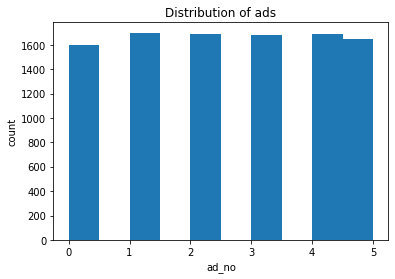

In [6]:
user = ucb.user
ucb = ucb.drop(['user'], axis = 1)   #Dropping user field
N = 10000               # no of iterations
d = 6                   # no of ad versions
total_reward_rand = 0   #variable to store total rewards or clicks throuout the iterations
  
#Loop through the iterations and random selection of ad
ad_selected = []       #List to store diff ad versions selected over iterations 
for i in range(0,N):   #For loop from 0 to 9999 
    ad = random.randrange(d)
    ad_selected.append(ad)
    reward = ucb.values[i,ad]
    total_reward_rand = total_reward_rand + reward
    
print('total clicks without any strategy: {}'.format(total_reward_rand))
#plot- Distribution of ad_selected
plt.hist(ad_selected)
plt.title('Distribution of ads')
plt.xlabel('ad_no')
plt.ylabel('count')
plt.show()

In [7]:
#Initialization
N = 10000               # no of iterations
d = 6                   # no of ad versions
ad_selected = []       #List to store diff ad versions selected over iterations                 
no_selection = [0] * d #List to store no of times diff ad versions selected
sum_reward = [0] * d   #List to store no of clicks diff ad versions get upto round N
total_reward_ucb = 0   # To store Total No clicks upto round N

total clicks with UCB Algorithm: 2028


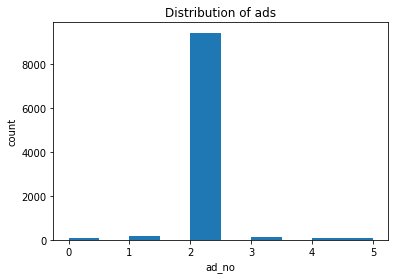

In [8]:
#loop through no of rounds 
for i in range(0,N):
    max_upper_bnd = 0     # Variable to store value of max UCB and resets at each round
    ad = 0               #temporary Variable to store ad version having highest UCB and starts with ad1 
    for j in range(0,d):  #Here loop starts with 0 index till index 5 
        if (no_selection[j] > 0):
           avg_reward = sum_reward[j]/no_selection[j]  
           delta_j = (math.sqrt(3/2) * math.log(i + 1)/no_selection[j])    #Refer Step2 for fig2
           upper_bnd = avg_reward + delta_j            #UCB calculation for ad version j for iteration i
        else:
           upper_bnd = 1e5                  #High value assigned during initial rounds
        if upper_bnd > max_upper_bnd:
           max_upper_bnd = upper_bnd
           ad = j
    ad_selected.append(ad)                   #List updates with ad selected at each round
    no_selection[ad] = no_selection[ad] + 1  
    reward = ucb.values[i,ad]                #Picks the user action- click/no click for selected ad at round i
    sum_reward[ad] = sum_reward[ad] + reward     #list updates to store rewards for diff add version     
    total_reward_ucb = total_reward_ucb + reward #Total rewards/clicks updates after every round
    
print('total clicks with UCB Algorithm: {}'.format(total_reward_ucb))
#plot- Distribution of ad_selected
plt.hist(ad_selected)
plt.title('Distribution of ads')
plt.xlabel('ad_no')
plt.ylabel('count')
plt.show()

In [ ]:
#loop through no of rounds 
for i in range(0,N):
    max_upper_bnd = 0     # Variable to store value of max UCB and resets at each round
    ad = 0               #temporary Variable to store ad version having highest UCB and starts with ad1 
    for j in range(0,d):  #Here loop starts with 0 index till index 5 
        if (no_selection[j] > 0):
           avg_reward = sum_reward[j]/no_selection[j]  
           delta_j = (math.sqrt(3/2) * math.log(i + 1)/no_selection[j])    #Refer Step2 for fig2
           upper_bnd = avg_reward + delta_j            #UCB calculation for ad version j for iteration i
        else:
           upper_bnd = 1e5                  #High value assigned during initial rounds
        if upper_bnd > max_upper_bnd:
           max_upper_bnd = upper_bnd
           ad = j
    ad_selected.append(ad)                   #List updates with ad selected at each round
    no_selection[ad] = no_selection[ad] + 1  
    reward = ucb.values[i,ad]                #Picks the user action- click/no click for selected ad at round i
    sum_reward[ad] = sum_reward[ad] + reward     #list updates to store rewards for diff add version     
    total_reward_ucb = total_reward_ucb + reward #Total rewards/clicks updates after every round
    
print('total clicks with UCB Algorithm: {}'.format(total_reward_ucb))
#plot- Distribution of ad_selected
plt.hist(ad_selected)
plt.title('Distribution of ads')
plt.xlabel('ad_no')
plt.ylabel('count')
plt.show()

In [10]:
#How many times Ad 3 selected after 1000 rounds till end
no_displayed = pd.Series(ad_selected[1000:N]).value_counts()
select_rate = no_displayed/len(ad_selected[1000:N])
#Let's also look click though rate of diff ad versions
sum_reward.sort(reverse = True)
no_selection.sort(reverse = True)    
click_probability = pd.Series(sum_reward)/pd.Series(no_selection)
ucb_output = pd.DataFrame({'Ad Version':no_displayed.index, 'No Displayed' : no_displayed.values, 'Display Rate' :select_rate.values, 'Click probability(CTR)':click_probability})
ucb_output

,Ad Version,No Displayed,Display Rate,Click probability(CTR)
0,2,8819,0.979889,0.208524
1,3,48,0.005333,0.147368
2,0,43,0.004778,0.114754
3,4,35,0.003889,0.091837
4,1,31,0.003444,0.091837
5,5,24,0.002667,0.072289
